In [836]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [837]:
con = sqlite3.connect('./data/password_data.sqlite')

In [838]:
sql_query = "SELECT * FROM USERS"

In [839]:
data = pd.read_sql_query(sql_query, con)

In [840]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [841]:
# STEP 1: DATA CLEANING

In [842]:
# drop un-necessary information

In [843]:
data.drop(['index'], axis=1, inplace=True)

In [844]:
data.head(3)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1


In [845]:
# Check duplicate rows

In [846]:
data.duplicated().sum()

0

In [847]:
#Check missing values

In [848]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [849]:
# Check irrelevant information e.g password strength should be positive so check if there is any negative value

In [850]:
data['strength'].unique()

array([1, 2, 0])

In [851]:
# STEP 2: DATA ANALYSIS

In [852]:
data['password'].str.islower().sum()

86678

In [853]:
data[data['password'].str.islower()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [854]:
data['password'].str.isupper().sum()

1506

In [855]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [856]:
data['password'].str.isnumeric().sum()

26

In [857]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [858]:
data['password'].str.isalpha().sum()

50

In [859]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [860]:
data['password'].str.istitle().sum()

932

In [861]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [862]:
data['password'].str.isalnum().sum()

97203

In [863]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [864]:
# Define funtion to check how many users have special characters in their password

In [865]:
import string 

In [866]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [867]:
def check_special_char(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [868]:
data['password'].apply(check_special_char).sum()

2663.0

In [869]:
data[data['password'].apply(check_special_char) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [870]:
# FEATURE ENGINEERING

In [871]:
# In this step we will try to get some useful features through which we can train our model

In [872]:
data['password'].str.len() # get length of each password

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [873]:
data["length"] = data['password'].str.len()

In [874]:
data.head(3)

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9


In [875]:
# Now we need to calculate the frequency of each type of character in passwords e.g lowercase_freq, uppercase_freq, special_char_freq etc

In [876]:
def check_lower_freq(row):
    return len([char for char in row if char.islower()])/len(row)

In [877]:
def check_upper_freq(row):
    return len([char for char in row if char.isupper()])/len(row)

In [878]:
def check_numeric_freq(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [879]:
def check_special_char_freq(row):
    return len([char for char in row if not char.isdigit() and not char.isalpha()])/len(row)

In [880]:
data['lower_freq'] = np.round(data['password'].apply(check_lower_freq), 3)
data.head(3)

,password,strength,length,lower_freq
0,zxe870819,1,9,0.333
1,xw46454nr23l,1,12,0.417
2,soporte13,1,9,0.778


In [881]:
data['upper_freq'] = np.round(data['password'].apply(check_upper_freq), 3)
data.head(3)

,password,strength,length,lower_freq,upper_freq
0,zxe870819,1,9,0.333,0.0
1,xw46454nr23l,1,12,0.417,0.0
2,soporte13,1,9,0.778,0.0


In [882]:
data['digit_freq'] = np.round(data['password'].apply(check_numeric_freq), 3)
data.head(3)

,password,strength,length,lower_freq,upper_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [883]:
data['special_char_freq'] = np.round(data['password'].apply(check_special_char_freq), 3)
data.head(5)

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [884]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

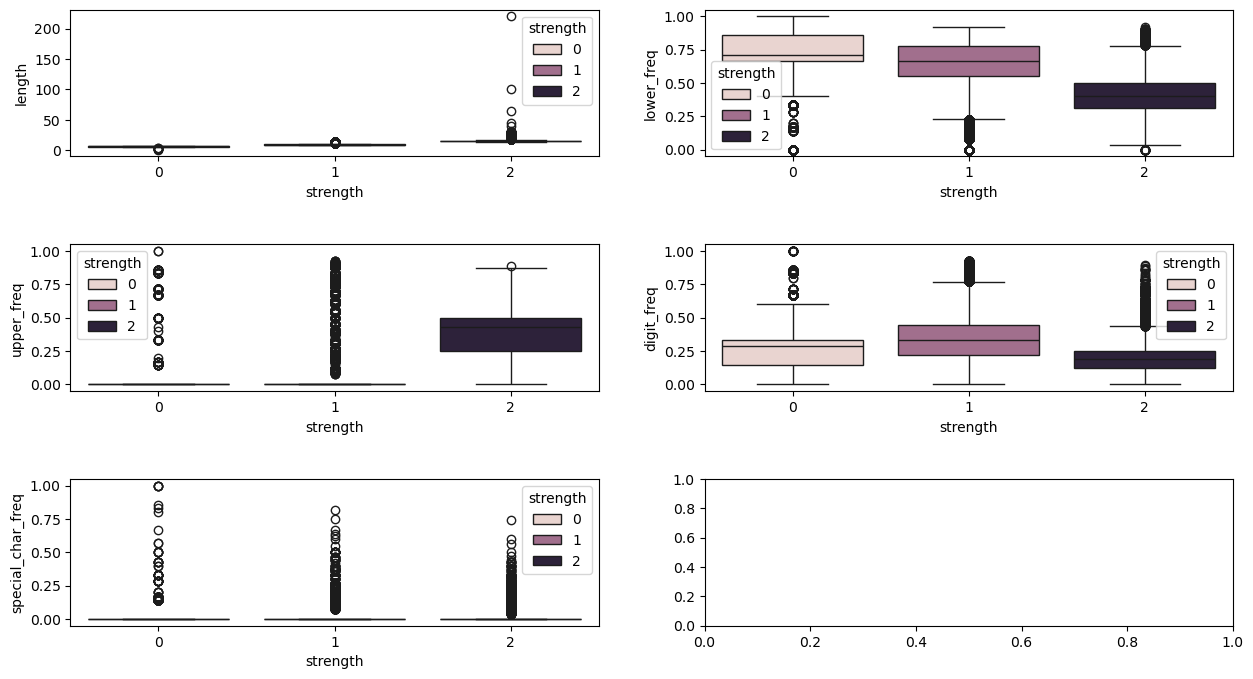

In [885]:
# Create a figure with 3 rows and 2 columns of subplots, with a specified figure size
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 8))

# Plot boxplots for different features against password strength
# Each boxplot shows the distribution of a feature for different password strengths
sns.boxplot(x="strength", y="length", hue="strength", ax=ax1, data=data)  # Boxplot for password length
sns.boxplot(x="strength", y="lower_freq", hue="strength", ax=ax2, data=data)  # Boxplot for lowercase frequency
sns.boxplot(x="strength", y="upper_freq", hue="strength", ax=ax3, data=data)  # Boxplot for uppercase frequency
sns.boxplot(x="strength", y="digit_freq", hue="strength", ax=ax4, data=data)  # Boxplot for digit frequency
sns.boxplot(x="strength", y="special_char_freq", hue="strength", ax=ax5, data=data)  # Boxplot for special character frequency

# Adjust the spacing between subplots to prevent overlap
plt.subplots_adjust(hspace=0.6)

In [886]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [887]:
def get_dist(data, feature):
    plt.figure(figsize=(8, 10))
    plt.subplot(1,2,1)

    sns.violinplot(x="strength", y=feature, data=data)

    plt.subplot(1,2,2)
    sns.kdeplot(data[data["strength"]==0][feature], color="red", label="0")
    sns.kdeplot(data[data["strength"]==1][feature], color="blue", label="1") 
    sns.kdeplot(data[data["strength"]==2][feature], color="orange", label="2")
    plt.legend()  # Show labels
    plt.subplots_adjust(wspace=0.5)
    plt.show()

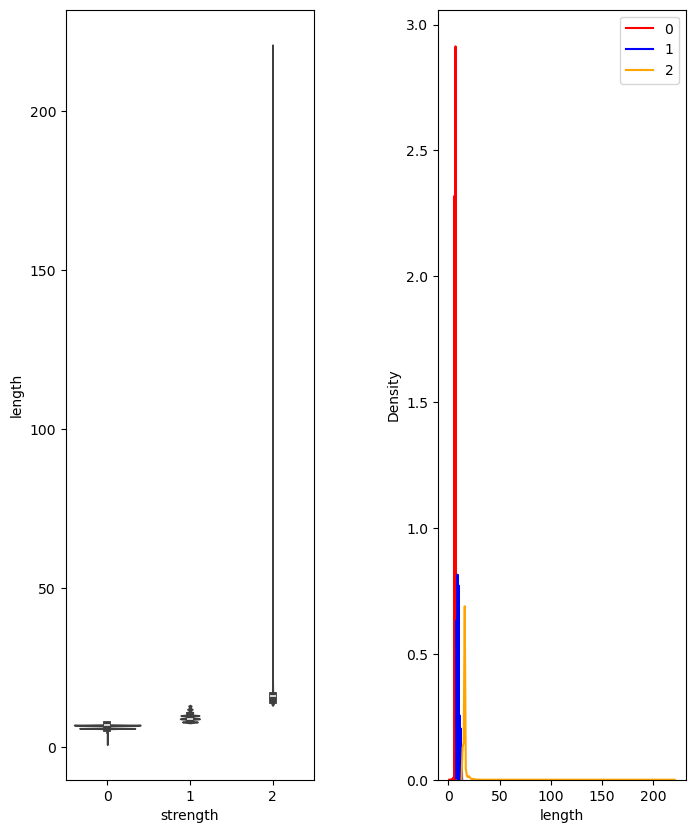

In [888]:
get_dist(data, "length")

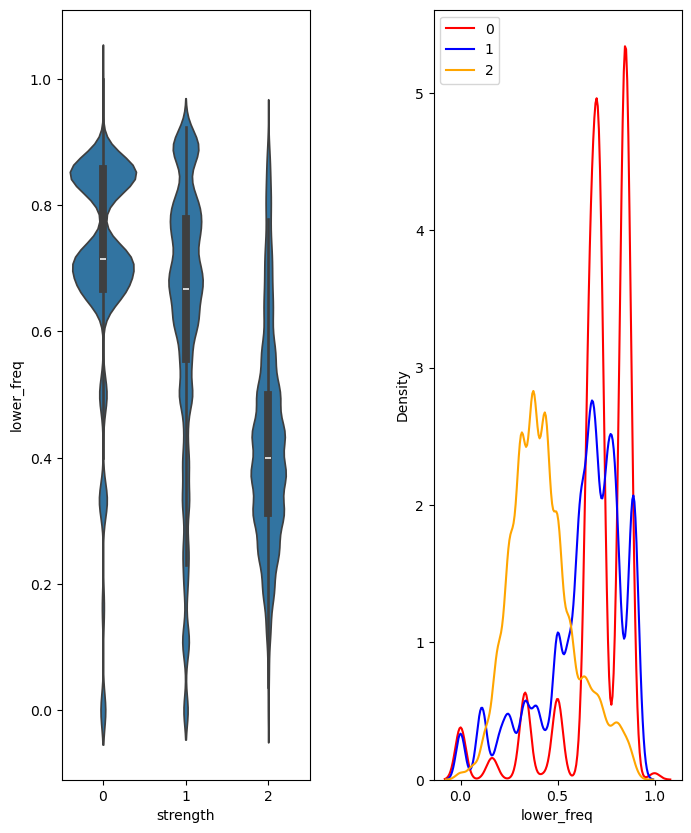

In [889]:
get_dist(data, "lower_freq")

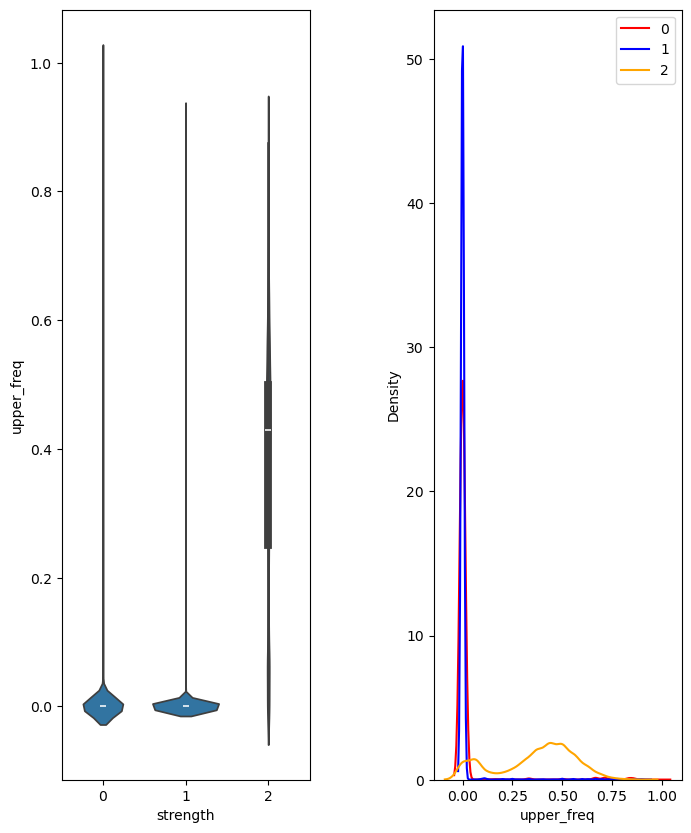

In [890]:
get_dist(data, "upper_freq")

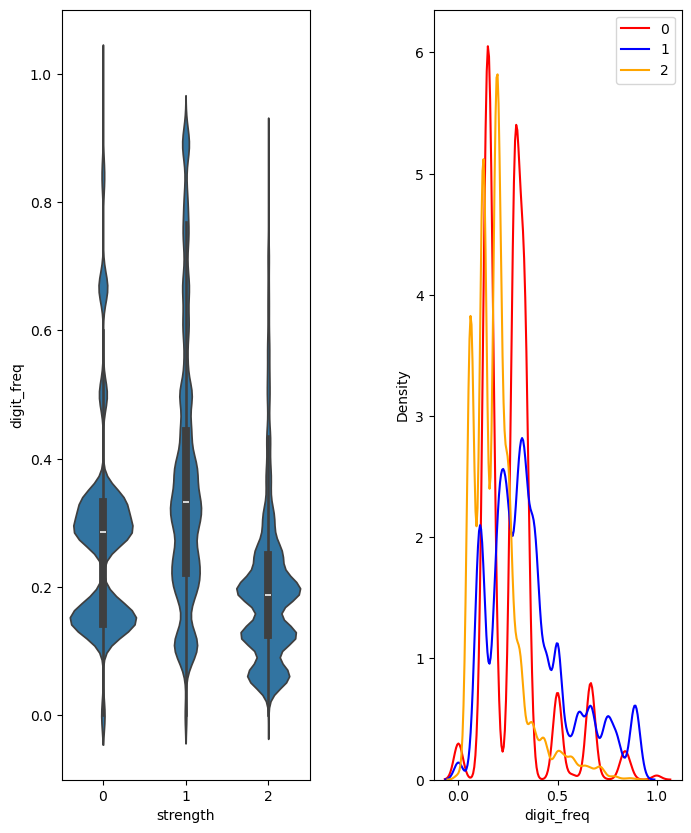

In [891]:
get_dist(data, "digit_freq")

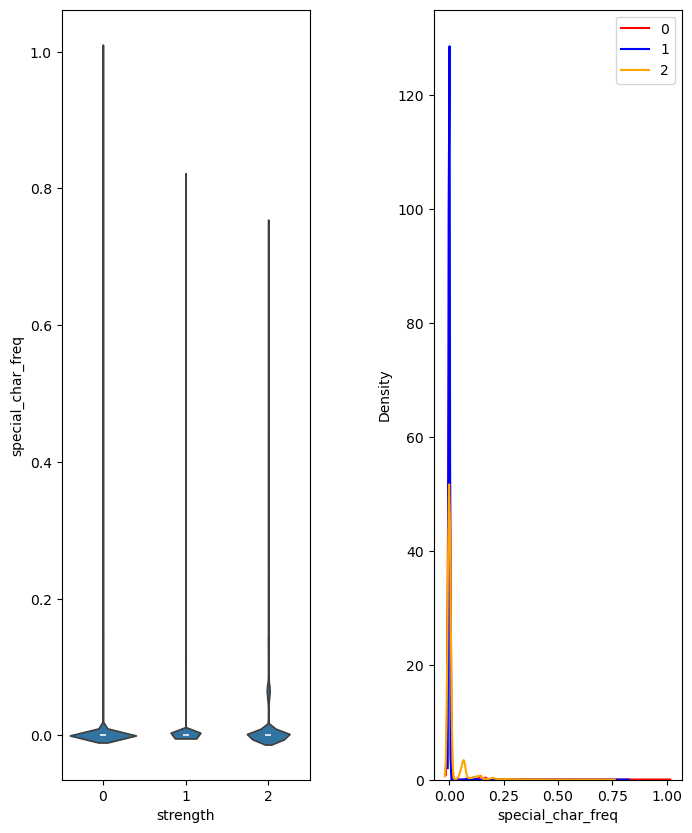

In [892]:
get_dist(data, "special_char_freq")

In [893]:
# Shuffling Data

In [894]:
data_frame = data.sample(frac=1)

In [895]:
data_frame

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
18636,huyanwei2,1,9,0.889,0.0,0.111,0.0
59190,25683501e,1,9,0.111,0.0,0.889,0.0
52413,ogjoiuer7,1,9,0.889,0.0,0.111,0.0
22918,waloi1,0,6,0.833,0.0,0.167,0.0
11270,nirvash12,1,9,0.778,0.0,0.222,0.0
...,...,...,...,...,...,...,...
890,z3x256p8g,1,9,0.444,0.0,0.556,0.0
26711,s1c2e3n4,1,8,0.500,0.0,0.500,0.0
89251,calambre12,1,10,0.800,0.0,0.200,0.0
34622,willy123,1,8,0.625,0.0,0.375,0.0


In [896]:
# Convert password column to TF-IDF matrix as passwords are in string formate

In [897]:
x = data_frame['password'] # Extract the 'password' column from the DataFrame

In [898]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [899]:
vectorizer = TfidfVectorizer(analyzer="char")  # Initialize a TF-IDF Vectorizer that analyzes character-level features

In [900]:
X = vectorizer.fit_transform(x) # Fit the vectorizer to the password data and transform it into a sparse matrix

In [901]:
print(X.shape)

(100000, 99)


In [902]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [903]:
X.toarray()[0] # this is how first password looks like in Sparse Matrix X.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.29125588, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24243874, 0.        , 0.        ,
       0.        , 0.28400633, 0.        , 0.        , 0.39129463,
       0.29430056, 0.        , 0.        , 0.        , 0.        ,
       0.31166394, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.34911225, 0.        , 0.42030007,
       0.        , 0.37462467, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [904]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [905]:
df2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [906]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [907]:
# Model Training

In [908]:
data_frame.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [909]:
# Add length and lower_freq column to df2 as these two features are contributing most to password strength

In [910]:
df2['length'] = data_frame['length']
df2['lower_freq'] = data_frame['lower_freq']

In [911]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lower_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [912]:
y = data_frame['strength']

In [913]:
from sklearn.model_selection import train_test_split

In [914]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20, random_state=42)

In [915]:
X_train.shape

(80000, 101)

In [916]:
y_train.shape

(80000,)

In [917]:
from sklearn.linear_model import LogisticRegression

In [918]:
clr = LogisticRegression(max_iter=1000)

In [919]:
clr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [920]:
y_pred = clr.predict(X_test)

In [921]:
# Evaluate Model Accuracy

In [922]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [923]:
accuracy_score(y_test, y_pred)

0.8192

In [ ]:
# The confusion matrix shows the actual vs. predicted classifications:
# - True Positives (TP): Correctly predicted positives
# - True Negatives (TN): Correctly predicted negatives
# - False Positives (FP): Incorrectly predicted positives (Type I error)
# - False Negatives (FN): Incorrectly predicted negatives (Type II error)

In [924]:
confusion_matrix(y_test, y_pred)

array([[  724,  1892,     0],
       [  534, 13955,   366],
       [   10,   814,  1705]])

In [ ]:
# - Precision: Ratio of correctly predicted positives to total predicted positives
# - Recall: Ratio of correctly predicted positives to all actual positives
# - F1-Score: Weighted average of precision and recall
# - Support: Number of actual occurrences of each class in the dataset

In [925]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.28      0.37      2616
           1       0.84      0.94      0.89     14855
           2       0.82      0.67      0.74      2529

    accuracy                           0.82     20000
   macro avg       0.74      0.63      0.67     20000
weighted avg       0.80      0.82      0.80     20000



In [926]:
def predict_pswrd_strength():
    pswrd = input("Enter password: ")
    pswrd_array = np.array([pswrd])
    vectorized_pswrd = vectorizer.transform(pswrd_array)

    pswrd_length = len(pswrd)
    pswrd_lowercase_freq = len([char for char in pswrd if char.islower()])/pswrd_length

    # Create a DataFrame for the new password with the same feature names
    new_password_df = pd.DataFrame(vectorized_pswrd.toarray(), columns=vectorizer.get_feature_names_out())
    new_password_df['length'] = pswrd_length
    new_password_df['lower_freq'] = pswrd_lowercase_freq

    # Ensure the order of columns matches the training data
    new_password_df = new_password_df[df2.columns]

    # Predict
    prediction = clr.predict(new_password_df)
    
    if prediction == 0:
        print("Password is weak")
    elif prediction == 1:
        print("Password is normal")
    else:
        print("Password is strong")

In [927]:
predict_pswrd_strength()

Enter password:  aaa


Password is weak
